In [1]:
import numpy as np
from solver import freq_top_opt_2D

In [2]:
%matplotlib inline

In [3]:
verbose = False
if not verbose:
    import warnings
    warnings.filterwarnings("ignore")

In [4]:
r = 1 # mesh refinement factor
upsc = 20 

scaling =  20e-9/r # the scale applied to the physical problem
fR = int(6*r) #int(r*3) # value for the filtering radius   
nElx = int(r*200) + 2*fR #400 # the number of elements in the X axis
nEly = int(r*100) + 2*fR #200 # the number of elements in the Y axis
tElmIdx = [int(r*100)+ fR, int(r*40)+ fR] #[200,100] # the target element for the optimization of the FOM
thickness = int(r*10) #15 # the thickness of the design region, in number of elements in the Y direction
limit = int(np.floor((nEly-2*fR)*9/10))+fR # the lower limit of the design region, 0.9 * total height of the simulation volume
dVElmIdx = np.array([np.arange(limit-thickness,limit),np.arange(fR,nElx-fR)])  # the indexes of the domain of the  design variables
thickness_part = int(r*35)
height_part = int(r*35)
dVElmIdx_part = np.array([np.arange(tElmIdx[1]-height_part//2,tElmIdx[1]+height_part//2),np.arange(tElmIdx[0]-thickness_part//2,tElmIdx[0]+thickness_part//2)])  # the indexes of the domain of the  design variables
dVElmIdx_part_pad = np.array([np.arange(tElmIdx[1]-height_part//2-2*fR,tElmIdx[1]+height_part//2+2*fR),np.arange(tElmIdx[0]-thickness_part//2-2*fR,tElmIdx[0]+thickness_part//2+2*fR)])  # the indexes of the domain of the  design variables


In [5]:
np.shape(dVElmIdx)

(2,)

In [6]:
dVs_tot = np.load("designs/attractive_v2.npy") 
len_dVs = len(dVElmIdx[0])*len(dVElmIdx[1])
lend_dVs_part = len(dVElmIdx_part[0])*len(dVElmIdx_part[1])
dVs =  dVs_tot[:len_dVs]
#dVs_part = dVs_tot[len_dVs:]
dVs_part = np.load("designs/dVs_part_test.npy") 
dVs = 0.0 * dVs

In [7]:
beta =  64.072265625 #42.71484375 #64.072265625 repulsive V1 #18.984375 attractive V1

In [8]:
eps = 4 # value of the dielectric function
eps_part = 4 # value of the dielectric function of the particle
part_shape = "design" # shape of the particle
part_size = int(r*10) # the size of the particle
wl = int(r*35)  #35  # value for the wavelentgth, i.e. 35 nm.
maxItr = 300 # number of iterations performed by the optimizer
alg = "MMA" # algorithm: Method of  Moving Asymptotes
eta = 0.5
solver = freq_top_opt_2D( tElmIdx,
                          dVElmIdx,
                          dVElmIdx_part,
                          dVElmIdx_part_pad,
                          nElx, 
                          nEly,
                          dVs,
                          dVs_part,  
                          eps, 
                          wl,  
                          fR,
                          eta, 
                          beta,
                          scaling,
                          part_shape,
                          part_size,
                          eps_part
                        )

FOM:  (57286053950310.39+0j)
Elapsed time in iteration: 0 min 7 s
----------------------------------------------


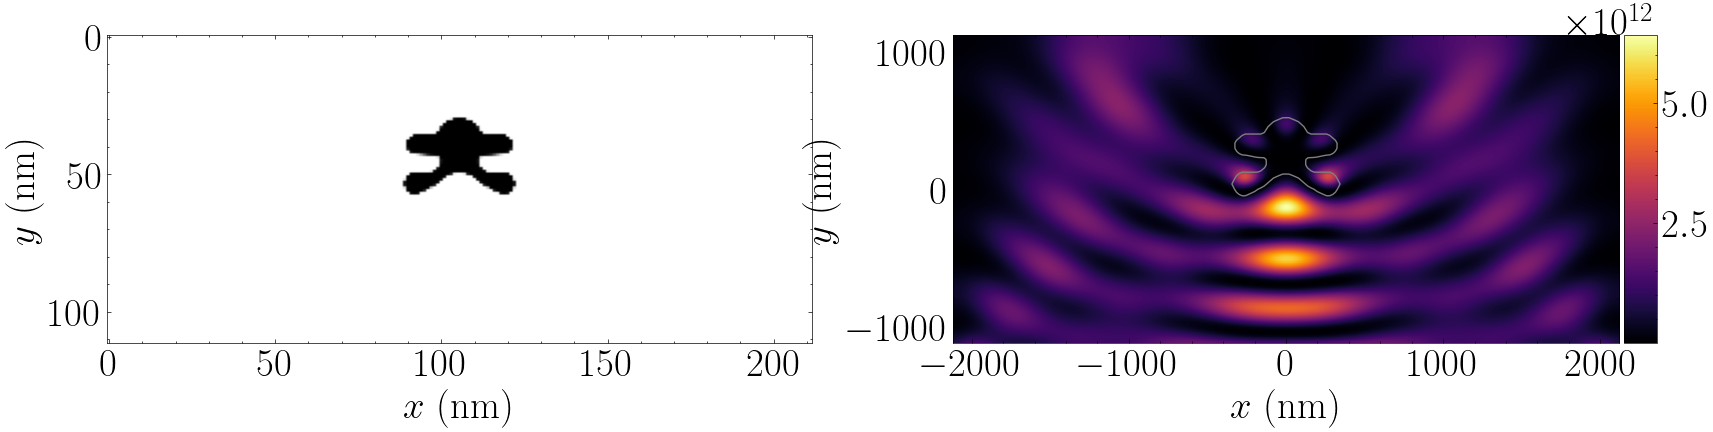

1494493.8965278254


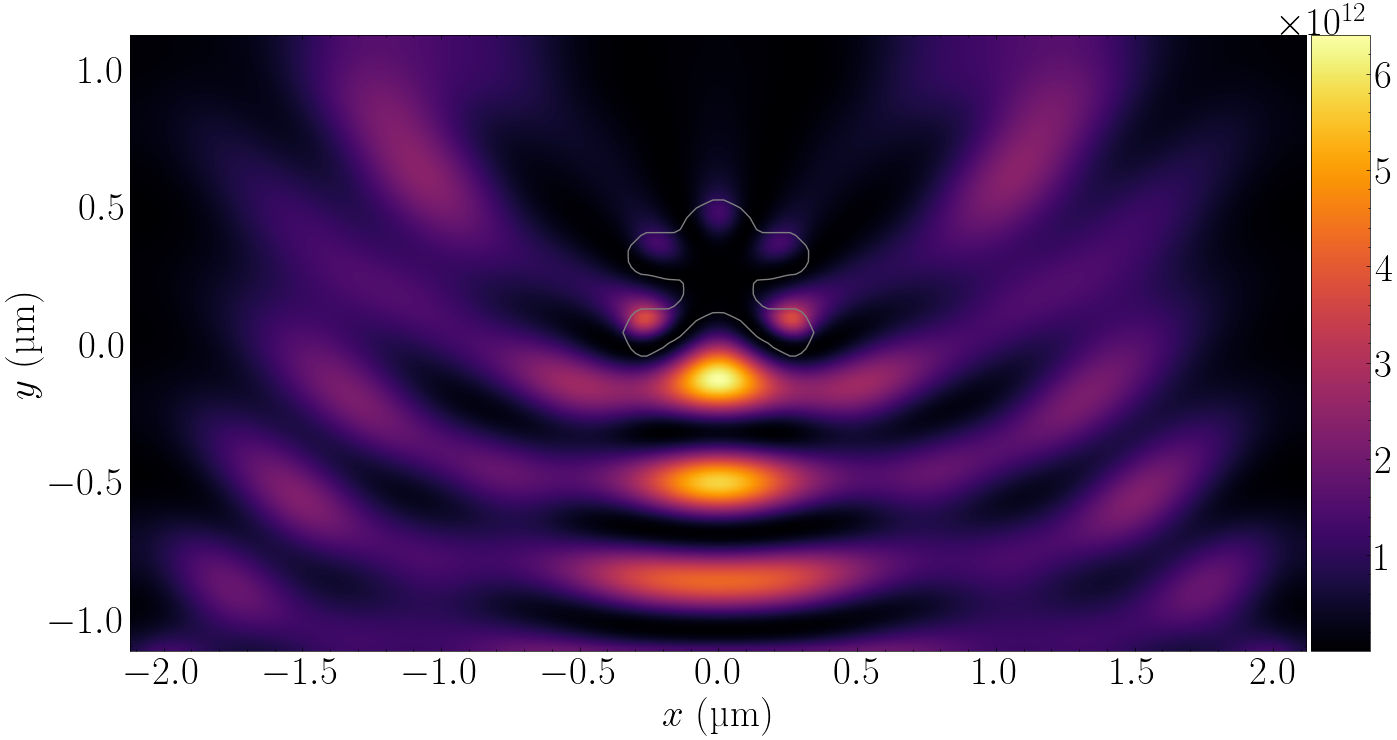

In [9]:
Ez, FOM = solver.solve_forward(dVs, dVs_part)

In [10]:
solver.calculate_forces()

Fx:  (3.156023155304055e-13+0j)
Fy:  (8.592908092546558e-06+0j)


In [11]:
raise()

TypeError: exceptions must derive from BaseException

In [ ]:
y_array = np.linspace(30,70,41)
Fy_array = np.zeros_like(y_array)
Fx_array = np.zeros_like(y_array)


for idx, y in enumerate(y_array):
    
    tElmIdx = [int(r*100)+ fR, int(r*y)+ fR] 
    dVElmIdx_part = np.array([np.arange(tElmIdx[1]-height_part//2,tElmIdx[1]+height_part//2),np.arange(tElmIdx[0]-thickness_part//2,tElmIdx[0]+thickness_part//2)])  # the indexes of the domain of the  design variables
    dVElmIdx_part_pad = np.array([np.arange(tElmIdx[1]-height_part//2-fR,tElmIdx[1]+height_part//2+fR),np.arange(tElmIdx[0]-thickness_part//2-fR,tElmIdx[0]+thickness_part//2+fR)])
    solver = freq_top_opt_2D( tElmIdx,
                          dVElmIdx,
                          dVElmIdx_part,
                          dVElmIdx_part_pad,
                          nElx, 
                          nEly,
                          dVs,
                          dVs_part,  
                          eps, 
                          wl,  
                          fR,
                          eta, 
                          beta,
                          scaling,
                          part_shape,
                          part_size,
                          eps_part
                        )
    
    Ez, FOM = solver.solve_forward(dVs, dVs_part)
    Fy_array[idx] = solver.dis_0.Fy
    Fx_array[idx] = solver.dis_0.Fx


In [ ]:
Fy_array = Fy_array / 1E9
Fx_array = Fx_array / 1E9

In [ ]:
Fy_array

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

plt.rcParams.update(plt.rcParamsDefault)
import scienceplots
import matplotlib as mpl
#mpl.rcParams.update({"font.size": 28})
#fig, ax = plt.subplots(figsize=(10,6))

with plt.style.context(['science', 'nature']):
    fig, ax = plt.subplots(figsize=(4,2.5))

    scaling = 20

    f_interpolated_x = interp1d(y_array*scaling, Fx_array, kind='cubic')
    f_interpolated_y = interp1d(y_array*scaling, Fy_array, kind='cubic')

    y_interp =  np.linspace(min(y_array)*scaling, max(y_array)*scaling, num=500)
    ax.axvspan((0 - 35 / 2)*scaling, (0 + 35 / 2)*scaling, color='gray', alpha=0.1)
    ax.axvline(x=10*scaling, color='gray', linestyle='--', alpha=0.5)  # Dashed vertical line at x = -10

    ax.scatter(-y_array*scaling +50*scaling, Fy_array, color="blue", label ="$\\langle F_y \\rangle $", alpha=1, edgecolors='black', linewidths=0.5, s=15)
    #ax.scatter(-y_array, Fy_array, color="blue", label ="$\\langle F_y \\rangle $", alpha=1, edgecolors='blue', s=7)
    #ax.plot(y_array-50, Fy_array, color="blue", alpha=0.25, linewidth=5)
    #ax.plot(-y_interp +50*scaling, f_interpolated_y(y_interp), color="blue", alpha=0.25, linewidth=5)
    ax.plot(-y_interp +50*scaling, f_interpolated_y(y_interp), color="blue", alpha=0.5, linewidth=1)
    #ax.plot(-y_interp , f_interpolated_y(y_interp), color="blue", alpha=0.25, linewidth=5)
    ax.scatter(-y_array*scaling+50*scaling, Fx_array, color="red", label ="$\\langle F_x \\rangle $", alpha=1, edgecolors='black', linewidths=0.5, s=15)
    #ax.scatter(-y_array, Fx_array, color="red", label ="$\\langle F_x \\rangle $", alpha=1, edgecolors='red', s=5)
    #ax.plot(y_array-50, Fx_array, color="red", alpha=0.25, linewidth=5)
    #ax.plot(-y_interp+50*scaling, f_interpolated_x(y_interp), color="red", alpha=0.25, linewidth=7)
    ax.plot(-y_interp+50*scaling, f_interpolated_x(y_interp), color="red", alpha=0.5, linewidth=1)
    #ax.plot(-y_interp, f_interpolated_x(y_interp), color="red", alpha=0.25, linewidth=7)

    bound = 37.54

    #ax.axhline(y=bound, color='green', linestyle='dotted', linewidth=1.5, label="Bound")


    ax.set_xlabel("$y$ (nm)", fontsize=14)
    ax.set_ylabel("$\\langle F_i \\rangle $ (pN/\\textmu m)", fontsize=14)

    #ax.set_ylim(-5, 42.5)
    plt.gca().invert_xaxis()
    #ax.autoscale(tight=True)
    plt.tick_params(axis='both', which='major', labelsize=12)

    ax.legend(frameon=True, fontsize=11, loc="best")
    #plt.yscale('log')  # Set y-axis to log scale

    plt.close()
fig

In [ ]:
raise()

In [ ]:
fig.savefig('plots/repulsive_free_distance.pdf', bbox_inches='tight')

In [ ]:
wl/2

In [ ]:
from scipy.signal import argrelextrema


max_index =  argrelextrema(Fy_array, np.greater)

y_max = y_array[max_index]

In [ ]:
print(y_max)

In [ ]:
print(np.diff(y_max))